# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

### Challenges : To examine a set of job postings with salaries and then predict salaries for a new set of job postings.

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#your info here
__author__ = "KIshan"
__email__ = "gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
test_features = pd.read_csv("./data/test_features.csv")
train_features = pd.read_csv("./data/train_features.csv")
train_salaries = pd.read_csv("./data/train_salaries.csv")

In [3]:
#Merge train_features and train_salaries
df=train_features.merge(train_salaries,how='left',on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [5]:
df.describe(include='all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684533730,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [6]:
df[df.duplicated()]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [7]:
(df['salary']<=0).sum() #No. of rows where salary<0.

5

### ---- 3 Clean the data ----

In [8]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
df.drop(df[df['salary']<=0].index, inplace=True) 

In [9]:
df.shape  # No missing or incorrect values

(999995, 9)

In [10]:
for i in df: # to Check NULL values
    print(i)
    print(pd.isnull(df[i]).value_counts())

jobId
False    999995
Name: jobId, dtype: int64
companyId
False    999995
Name: companyId, dtype: int64
jobType
False    999995
Name: jobType, dtype: int64
degree
False    999995
Name: degree, dtype: int64
major
False    999995
Name: major, dtype: int64
industry
False    999995
Name: industry, dtype: int64
yearsExperience
False    999995
Name: yearsExperience, dtype: int64
milesFromMetropolis
False    999995
Name: milesFromMetropolis, dtype: int64
salary
False    999995
Name: salary, dtype: int64


In [11]:
df.dtypes # To check dataTypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

### ---- 4 Explore the data (EDA) ----

In [12]:
#summarize each feature variable
#summarize the target variable
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [13]:
#look for correlation between each feature and the target
#look for correlation between features
Q1=df['salary'].quantile(0.25)
Q3=df['salary'].quantile(0.75) #141
IQR = Q3-Q1
IQR

53.0

In [14]:
#Below 25th quantile (Q1 - 1.5*IQR)
df[(df['salary'] < Q1 - (1.5*IQR))]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [15]:
# We can see which jobs are > 75th quantile
salary_Q3 = df[(df['salary'] > (Q3 + (1.5*IQR)))]
salary_Q3

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [16]:
#
salary_Q3.groupby(df['jobType']).count()['salary']

jobType
CEO               3227
CFO               1496
CTO               1488
JUNIOR              20
MANAGER            217
SENIOR              66
VICE_PRESIDENT     603
Name: salary, dtype: int64

In [17]:
salary_Q3[(salary_Q3.jobType == "JUNIOR")]
# Masters and Doctoral have higher pay.

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


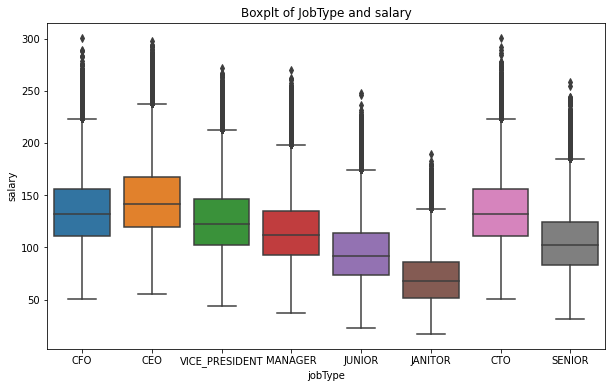

In [18]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='jobType', y='salary')
plt.title('Boxplt of JobType and salary')
plt.show()

CEO have higher pay.

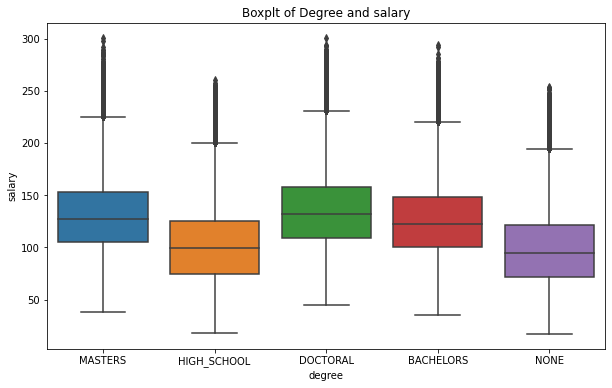

In [19]:
# Degree
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Boxplt of Degree and salary')
plt.show()

Masters and Doctoral have higher pay.

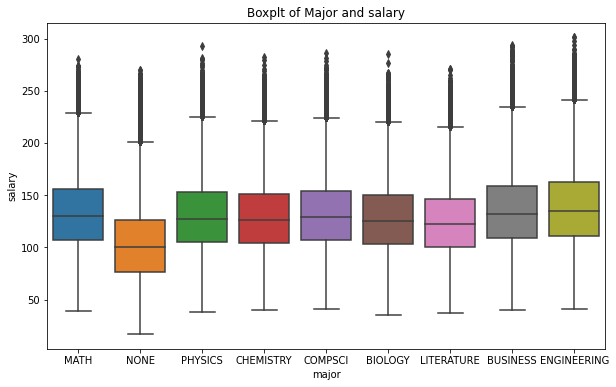

In [20]:
# Major
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='major', y='salary')
plt.title('Boxplt of Major and salary')
plt.show()

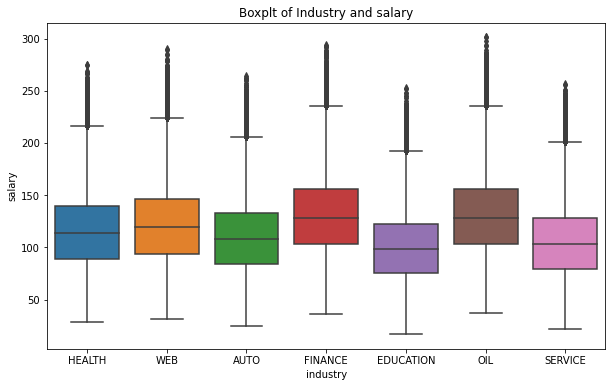

In [21]:
# Boxplt of Industry and salary
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='industry', y='salary')
plt.title('Boxplt of Industry and salary')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

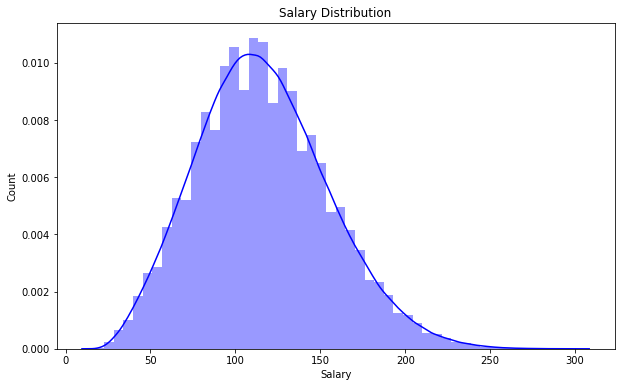

In [22]:
# Salary Distribution
fig=plt.figure(figsize=(10,6))
sns.distplot(df.salary, color='b')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

In [23]:
#Bins for Salary
bins = np.linspace(min(df["salary"]), max(df["salary"]), 5)
group = ['Low', 'Medium', 'High','Maximum']
df['df_1'] = pd.cut(df["salary"], bins, labels=group)

Text(0, 0.5, 'Count')

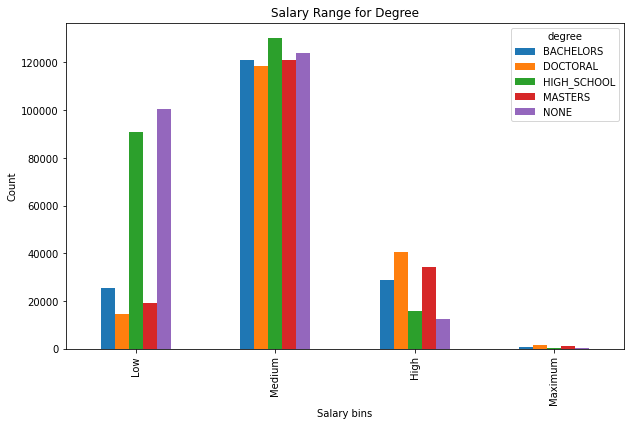

In [24]:
bins_degree = df.groupby('df_1')['degree'].value_counts().unstack()
bins_degree.plot(kind='bar', figsize=(10, 6))
plt.title('Salary Range for Degree')
plt.xlabel('Salary bins')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

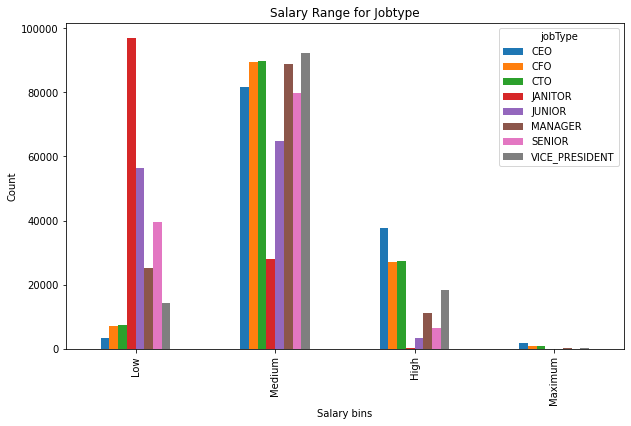

In [25]:
#Salary and JobType
bins_Jobtype = df.groupby('df_1')['jobType'].value_counts().unstack()
bins_Jobtype.plot(kind='bar', figsize=(10, 6))
plt.title('Salary Range for Jobtype')
plt.xlabel('Salary bins')
plt.ylabel('Count')

# **CorRelation between all variables.**

In [26]:
corr_df=df.copy()

In [27]:
#Convert the Data type from object to category
corr_df[['companyId','jobType','major','degree','industry']]=df[['companyId',
    'jobType','major','degree','industry']].astype('category')

In [28]:
#Creating def function and replacing all varibles with that groups subcategory
col_means = ['companyId','jobType','major','degree','industry']

def to_num(col):
    for i in col:
        corr_df[i] = corr_df.groupby(i).transform('mean')['salary']

In [29]:
#calling the function to_num
to_num(col_means)
corr_df = corr_df.drop(columns=['df_1','jobId'])

In [30]:
corr_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


In [31]:
#CorRelation
cor_r=corr_df.corr()
cor_r

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
companyId,1.000000,0.005552,0.004423,0.004490,0.002042,0.001890,-0.002230,0.008498
jobType,0.005552,1.000000,0.288261,0.256843,0.002214,0.001118,0.000024,0.597463
degree,0.004423,0.288261,1.000000,0.853049,0.000870,0.000012,0.001978,0.401300
major,0.004490,0.256843,0.853049,1.000000,0.000367,-0.000129,0.001519,0.378675
industry,0.002042,0.002214,0.000870,0.000367,1.000000,0.000709,-0.001102,0.296626
yearsExperience,0.001890,0.001118,0.000012,-0.000129,0.000709,1.000000,0.000672,0.375013
milesFromMetropolis,-0.002230,0.000024,0.001978,0.001519,-0.001102,0.000672,1.000000,-0.297686
salary,0.008498,0.597463,0.401300,0.378675,0.296626,0.375013,-0.297686,1.000000


Text(0.5, 1.0, 'CorRelation Matrix')

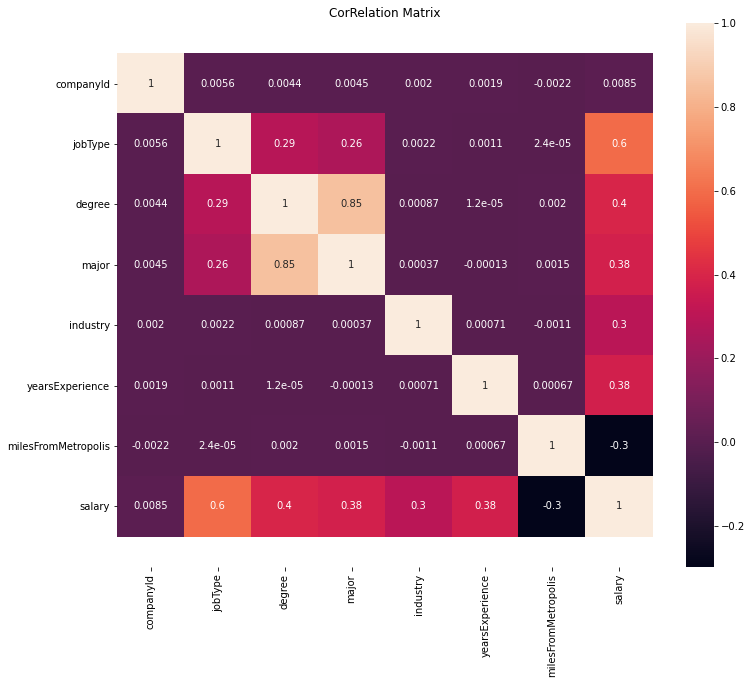

In [32]:
#Heatmap plotting
plt.figure(figsize=(12,10))
ax = sns.heatmap(cor_r, xticklabels=cor_r.columns.values,yticklabels=cor_r.columns.values, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('CorRelation Matrix')

### ---- 5 Establish a baseline ----

In [33]:
# Average salary
#
avg_salary = pd.DataFrame(df['salary'].groupby(df.industry).mean())
predicted  = df.merge(avg_salary ,on='industry', how='inner')

In [34]:
# Calculate Mean Squared Error
mse_base=np.mean((predicted['salary_x']-predicted['salary_y'])**2)
print("The Mean Squared Error for baseline is :", np.round(mse_base,3))

The Mean Squared Error for baseline is : 1367.123


### ---- 6 Hypothesize solution ---- **Data Analysis**

In [35]:
#
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

df[['yearsExperience','milesFromMetropolis']] = mms.fit_transform(df[['yearsExperience','milesFromMetropolis']])

In [36]:
number_var = ['yearsExperience', 'milesFromMetropolis', 'salary']

category_var = ['jobType','degree', 'major','industry']
categorical_df = pd.get_dummies(df[category_var], drop_first=True)
numerical_df = df[number_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.shape

(999995, 28)

In [37]:
new_df.head()

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis,salary
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0.416667,0.838384,130
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.125000,0.737374,101
2,0,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0.416667,0.383838,137
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0.333333,0.171717,142
4,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0.333333,0.161616,163


In [38]:
# Normal x and y 
x_normal = new_df.iloc[:,:27]
y_normal = new_df.iloc[:,-1]

In [39]:
# train, test spilt 
x_train, x_test, y_train, y_test = train_test_split(x_normal,y_normal,test_size=0.3, random_state=0)
print("The number of samples in training are:" , x_train.shape)
print("The number of samples in testing are:" , x_test.shape)
print("The number of samples in training are:" , y_train.shape)
print("The number of samples in testing are:" , y_test.shape)

The number of samples in training are: (699996, 27)
The number of samples in testing are: (299999, 27)
The number of samples in training are: (699996,)
The number of samples in testing are: (299999,)


Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- Linear Regression ----

In [40]:
#create and tune the models that you brainstormed during part 2
# regression model
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)

0.7439387881506947

In [41]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_test,lr1.predict(x_test))

In [42]:
# Creating new pandas dataframe with model name and its mse results
results = pd.DataFrame(columns=['model','mean_square_error'])

In [43]:
# naming the columns and append results
lr_row = {'model':'Linear Regression','mean_square_error': mse_lr}
results = results.append(lr_row, ignore_index=True)
results

,model,mean_square_error
0,Linear Regression,384.340904


In [44]:
# Calculate r2
from sklearn.metrics import r2_score

linear_r2 = sk.metrics.r2_score(y_test, lr1.predict(x_test))
print("The r2 for Linear Regression model :",np.round(linear_r2,3))

The r2 for Linear Regression model : 0.743


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Salary Range')

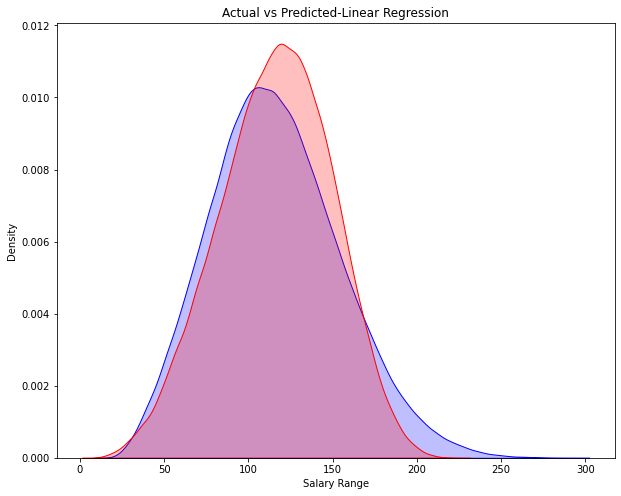

In [45]:
# linear regression model predicts the salary 
fig = plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test,hist=False,color='b',label='Actual',kde_kws={"shade": True})
sns.distplot(lr1.predict(x_test),hist=False,color='r',label='Predicted',kde_kws={"shade": True})

plt.title('Actual vs Predicted-Linear Regression')
plt.xlabel('Salary Range')

## **Ridge Regression**

In [46]:
from sklearn.linear_model import Ridge
lr_ridge=Ridge()
lr_ridge.fit(x_train,y_train)


Ridge()

In [47]:
mse_ridge=mean_squared_error(y_test,lr_ridge.predict(x_test))

ridge_row={'model':'Ridge Regression','mean_square_error': mse_ridge}
results = results.append(ridge_row, ignore_index=True)
results

,model,mean_square_error
0,Linear Regression,384.340904
1,Ridge Regression,384.341017


In [48]:
ridge_r2 = sk.metrics.r2_score(y_test, lr_ridge.predict(x_test))
print("The r2 for Linear Regression model :",np.round(ridge_r2,3))

The r2 for Linear Regression model : 0.743


## **Random Forest**

In [49]:
r_f = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30,min_samples_split=60, max_features='auto', verbose=0)
neg_mse= cross_val_score(r_f,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
rf_mse = -1.0*np.mean(neg_mse)

In [50]:
rforest_row = {'model':'Random Forest','mean_square_error': rf_mse}
results = results.append(rforest_row, ignore_index=True)

## **Gradient Boosting**

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gb_r = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
neg_mse_gbr = cross_val_score(gb_r,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
gbr_mse = -1.0*np.mean(neg_mse_gbr)

In [58]:
gb_r.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=160)

In [59]:
Boost_row = {'model':'Gradient Boosting','mean_square_error': gbr_mse}
results = results.append(Boost_row, ignore_index=True)
results

,model,mean_square_error
0,Linear Regression,384.340904
1,Ridge Regression,384.341017
2,Random Forest,377.469306
3,Gradient Boosting,359.685899


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Salary Range')

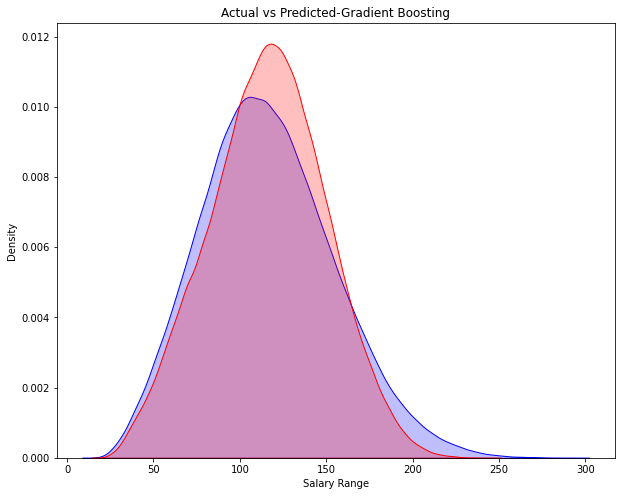

In [61]:
fig = plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test,hist=False,color='b',label='actual',kde_kws={"shade": True})
sns.distplot(gb_r.predict(x_test),hist=False,color='r',label='predicted',kde_kws={"shade": True})
plt.title('Actual vs Predicted-Gradient Boosting')
plt.xlabel('Salary Range')

# **BEST Model**

In [62]:
results.min()

model                Gradient Boosting
mean_square_error              359.686
dtype: object

## Part 4 - DEPLOY

In [63]:
test_f = test_features.copy()

In [64]:
# Preparing the data for analysis, creating dummy for categorial variable and scaling nnumeric varibales
num_test = ['yearsExperience', 'milesFromMetropolis']
cat_test = ['jobType','degree', 'major','industry']

mms1 = MinMaxScaler()
cat_df = pd.get_dummies(test_f[cat_test], drop_first=True)
num_df = pd.DataFrame(mms1.fit_transform(test_f[num_test]))

test_final = pd.concat([cat_df,num_df], axis=1)
test_final.shape

(1000000, 27)

In [65]:
#Rename columns
test_final= test_final.rename(columns={0:'milesFromMetropolis',1:'yearsExperience'})
test_final.head()

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,milesFromMetropolis,yearsExperience
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0.916667,0.737374
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.833333,0.474747
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0.708333,0.090909
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0.583333,0.969697
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.416667,0.444444


In [67]:
test_salary = pd.DataFrame(gb_r.predict(test_final)) # Predict results
prediction_df=pd.concat([test_features['jobId'],test_salary ],axis=1)
prediction_df.head()

,jobId,0
0,JOB1362685407687,113.695549
1,JOB1362685407688,94.655870
2,JOB1362685407689,176.328297
3,JOB1362685407690,105.017116
4,JOB1362685407691,118.102790


In [68]:
prediction_df.to_csv('Predicted_salary.csv')

**Feature Importance**

In [70]:
importance = gb_r.feature_importances_
feature_importance = pd.DataFrame({'Feature':test_final.columns, "Importance" : importance})

In [71]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.set_index('Feature', inplace=True, drop=True) # Sorting values

Text(0.5, 1.0, 'Feature Importance PLOT')

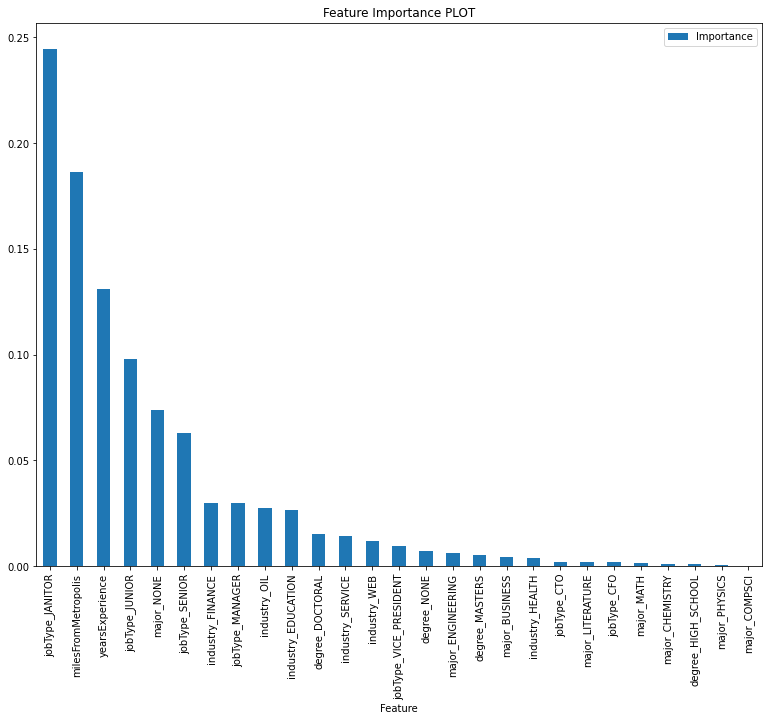

In [73]:
fig = feature_importance.plot.bar(figsize=(13,10))
fig.set_title('Feature Importance PLOT')